In [ ]:
# Q1 Import necessary Python libraries (Install PyPDF2 and py-readability-metrics)

# Repeatable code for all assignments
# import nltk
# !pip install PyPDF2
# import PyPDF2 
# import wordcloud 
# !pip install certifi
# !pip install py-readability-metrics

# Q2 import nltk and run the following commands

# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('vader_lexicon')
                 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from PyPDF2 import PdfReader


In [6]:
df_reuters = PdfReader("reuters.com-Harvard president will submit dissertation edits after plagiarism allegations.pdf")
df_foxnews = PdfReader ("foxnews.com-Embattled Harvard University President Claudine Gay hit with more plagiarism charges.pdf")

In [ ]:
# Q3 briefly characterize the issue at hand and your impressions
""" Both news articles headline is on the accusation of plagiarism for Harvards School President Claudine Gay. Both articles give examples of how 
Claudine Gay had tried to submitt corrections to her published articles including her 1997 Harvard Ph.D. dissertation. Both articles described 
how the plagiarism examples were the basis for calls for her resignation from the post. However I noticed that the foxnews article had listed 
40 different plagiarism cases vs. the reuters article had only mentioned just 3 cases. In addition foxnews also accused the Harvard Corporation 
for being soft on faculty plagiarism cases in the past as well. Foxnews article used more colorful verbiage such as "Embattled" which is 
an opinion more so than stating the facts.

In [39]:
# Q4 Used PyPDF2 PdfReader to extract the text out of each document
reuters_num_pages = len(df_reuters.pages)
df_reuters_text = ""
for page_num in range(reuters_num_pages):
    df_reuters_page = df_reuters.pages[page_num]
    df_reuters_text += df_reuters_page.extract_text()  # Extract the text from the current page
print ('**This is the Reuters News Article:**')
print (df_reuters_text)

fox_num_pages = len(df_foxnews.pages)
df_foxnews_text = ""
for page_num in range(fox_num_pages):
    df_foxnews_page = df_foxnews.pages[page_num]
    df_foxnews_text += df_foxnews_page.extract_text()  # Extract the text from the current page
print ('**This is the Fox News Article:**')
print (df_foxnews_text)

"""
The extracted text is hard to read as its suppressing indentetions or paragraph spacings. the footnotes are merged with 
the rest of the text. hard to see were one page ends and the next begins. 
"""

**This is the Reuters News Article:**
1 / 3Gabriella BorterHarvard president will submit dissertation edits after
plagiarism allegations
reuters.com /world/us/embattled-harvard-president-will-submit-dissertation-edits-after-plagiarism-2023-12-21
Harvard University President Claudine Gay testifies before a House Education and The
Workforce Committee hearing titled "Holding Campus Leaders Accountable and Confronting
Antisemitism" on Capitol Hill in W ashington, U.S., December 5, 2023. REUTERS/Ken
Cedeno/File Photo Acquire Licensing Rights
Dec 21 (Reuters) - Harvard University's president was planning to submit three corrections to
her 1997 dissertation after a committee investigating plagiarism allegations against her found
that she had made citation errors, a university spokesperson said.
Claudine Gay , who was inaugurated as Harvard's president in September , has already
submitted corrections to two published articles in recent weeks that were the focus of a
review by the Harvard Corpo

'the extracted text is hard to read as its suppressing indentetions or paragraph spacings. Pictures are missing as well.'

In [42]:
# Q5 Use NLTK to complete sentiment analysis

""" 
Reviewing the sentiment analysis results the reuters article has a higher neutral score vs. the foxnews one. However the 
compound score for the reuters arcticle is negative vs. a positive compound score for the foxnews one.
"""

import nltk
nltk.download('punkt_tab')
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import sent_tokenize

# Ensure necessary NLTK data is downloaded
try:
    nltk.data.find('vader_lexicon')
except LookupError:
    nltk.download('vader_lexicon')
try:
    nltk.data.find('punkt')
except LookupError:
    nltk.download('punkt')
    
# Sentiment Analyzer for the reuters article
def analyze_article_sentiment(df_reuters_text):
    """
    Analyzes the sentiment of an article using NLTK's VADER sentiment analyzer.

    Args:
        article_text (str): The text content of the article.

    Returns:
        dict: A dictionary containing overall sentiment scores and scores for each sentence.
    """
    sia = SentimentIntensityAnalyzer()
    sentences = sent_tokenize(df_reuters_text)

    sentence_sentiments = []
    for sentence in sentences:
        scores = sia.polarity_scores(sentence)
        sentence_sentiments.append({"sentence": sentence, "scores": scores})

    overall_scores = sia.polarity_scores(df_reuters_text)

    return {"overall_sentiment": overall_scores, "sentence_sentiments": sentence_sentiments}

sentiment_results = analyze_article_sentiment(df_reuters_text)

print("Overall Sentiment:")
print(sentiment_results["overall_sentiment"]) # print negative, positive and neutral score as well as compound score

print("\nSentence Sentiments:")
for sentence_data in sentiment_results["sentence_sentiments"]:
    print(f"Sentence: {sentence_data['sentence']}")
    print(f"Scores: {sentence_data['scores']}")
    print("-" * 20)


Overall Sentiment:
{'neg': 0.07, 'neu': 0.904, 'pos': 0.026, 'compound': -0.9719}

Sentence Sentiments:
Sentence: 1 / 3Gabriella BorterHarvard president will submit dissertation edits after
plagiarism allegations
reuters.com /world/us/embattled-harvard-president-will-submit-dissertation-edits-after-plagiarism-2023-12-21
Harvard University President Claudine Gay testifies before a House Education and The
Workforce Committee hearing titled "Holding Campus Leaders Accountable and Confronting
Antisemitism" on Capitol Hill in W ashington, U.S., December 5, 2023.
Scores: {'neg': 0.037, 'neu': 0.963, 'pos': 0.0, 'compound': -0.1531}
--------------------
Sentence: REUTERS/Ken
Cedeno/File Photo Acquire Licensing Rights
Dec 21 (Reuters) - Harvard University's president was planning to submit three corrections to
her 1997 dissertation after a committee investigating plagiarism allegations against her found
that she had made citation errors, a university spokesperson said.
Scores: {'neg': 0.059, '

[nltk_data] Downloading package punkt_tab to C:\Users\dallvo
[nltk_data]     genti\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package vader_lexicon to C:\Users\dallvo
[nltk_data]     genti\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\dallvo
[nltk_data]     genti\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [43]:
# Sentiment Analyzer for the foxnews article

def analyze_article_sentiment(df_foxnews_text):
    """
    Analyzes the sentiment of an article using NLTK's VADER sentiment analyzer.

    Args:
        article_text (str): The text content of the article.

    Returns:
        dict: A dictionary containing overall sentiment scores and scores for each sentence.
    """
    sia = SentimentIntensityAnalyzer()
    sentences = sent_tokenize(df_foxnews_text)

    sentence_sentiments = []
    for sentence in sentences:
        scores = sia.polarity_scores(sentence)
        sentence_sentiments.append({"sentence": sentence, "scores": scores})

    overall_scores = sia.polarity_scores(df_foxnews_text)

    return {"overall_sentiment": overall_scores, "sentence_sentiments": sentence_sentiments}


sentiment_results = analyze_article_sentiment(df_foxnews_text)

print("Overall Sentiment:")
print(sentiment_results["overall_sentiment"])

print("\nSentence Sentiments:")
for sentence_data in sentiment_results["sentence_sentiments"]:
    print(f"Sentence: {sentence_data['sentence']}")
    print(f"Scores: {sentence_data['scores']}")
    print("-" * 20)


Overall Sentiment:
{'neg': 0.065, 'neu': 0.866, 'pos': 0.07, 'compound': 0.7243}

Sentence Sentiments:
Sentence: 1 / 5Brian FloodEmbattled Harvard University President Claudine Gay hit
with more plagiarism charges
foxnews.com /media/embattled-harvard-university-president-claudine-gay-hit-more-plagiarism-charges
Media
Harvard ‘received a complaint outlining over 40 allegations of
plagiarism,’ according to the Free Beacon
 By Brian Flood  Fox News
Published December 20, 2023 12:59pm EST
Harvard president facing 40 new allegations of plagiarism
Fox News' Molly Line reports the latest on the allegations.
Scores: {'neg': 0.073, 'neu': 0.875, 'pos': 0.052, 'compound': -0.0717}
--------------------
Sentence: Embattled Harvard University President Claudine Gay  has been slapped with additional
charges of plagiarism.
Scores: {'neg': 0.139, 'neu': 0.861, 'pos': 0.0, 'compound': -0.2732}
--------------------
Sentence: The Washington Free Beacon  reported Harvard "received a complaint outlining ov

In [104]:
# Q6 Run sentiment analysis on the article headlines
"""
The sentiment analysis scores do not match the sentiment analysis scores on the entire article however for both stories
the neutral scores are directionaly correct
"""

def analyze_headline_sentiment(headline):
    """
    Analyzes the sentiment of a headline using NLTK's VADER sentiment analyzer.

    Args:
        headline (str): The text of the headline.

    Returns:
        dict: A dictionary containing the sentiment scores.
    """
    sia = SentimentIntensityAnalyzer()
    scores = sia.polarity_scores(headline)
    return scores

reuters_headline = "Harvard president will submit dissertation edits afterplagiarism allegations"
foxnews_headline = "Embattled Harvard University President Claudine Gay hitwith more plagiarism charges"


reuters_sentiment = analyze_headline_sentiment(reuters_headline)
foxnews_sentiment = analyze_headline_sentiment(foxnews_headline)

print(f"Headline: '{reuters_headline}'")
print(f"Sentiment: {reuters_sentiment}")
print("-" * 20)

print(f"Headline: '{foxnews_headline}'")
print(f"Sentiment: {foxnews_sentiment}")
print("-" * 20)


Headline: 'Harvard president will submit dissertation edits afterplagiarism allegations'
Sentiment: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
--------------------
Headline: 'Embattled Harvard University President Claudine Gay hitwith more plagiarism charges'
Sentiment: {'neg': 0.209, 'neu': 0.791, 'pos': 0.0, 'compound': -0.3353}
--------------------


In [102]:
#!pip install --upgrade py-readability-metrics

from readability import Readability

def calculate_readability_scores(text):
    """
    Calculates readability scores using py-readability-metrics.

    Args:
        text (str): The text to analyze.

    Returns:
        dict: A dictionary containing the readability scores.
    """
    try:
        r = Readability(text)
        flesch_reading_ease = r.flesch()
        flesch_kincaid_grade = r.flesch_kincaid()
        #smog_grade = r.smog(False)
        fog_grade =r.gunning_fog()

        return {
            "flesch_reading_ease": flesch_reading_ease.score,
            "flesch_kincaid_grade": flesch_kincaid_grade.score,
            "fog_grade":fog_grade.score
            #"smog_grade": smog_grade.score,
        }
    except Exception as e:
        return {"error": str(e)}
        
reuters_scores = calculate_readability_scores(df_reuters_text)
foxnews_scores = calculate_readability_scores(df_foxnews_text)

print("Reuters Readability Scores:")
print(reuters_scores)
print("\nFoxNews Readability Scores:")
print(foxnews_scores)



Reuters Readability Scores:
{'flesch_reading_ease': 16.550377619402184, 'flesch_kincaid_grade': 18.706800340389325, 'fog_grade': 19.59404318689501}

FoxNews Readability Scores:
{'flesch_reading_ease': 21.41115320671068, 'flesch_kincaid_grade': 19.21912993097889, 'fog_grade': 21.868487077434633}


[nltk_data] Downloading package stopwords to C:\Users\dallvo
[nltk_data]     genti\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\dallvo
[nltk_data]     genti\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


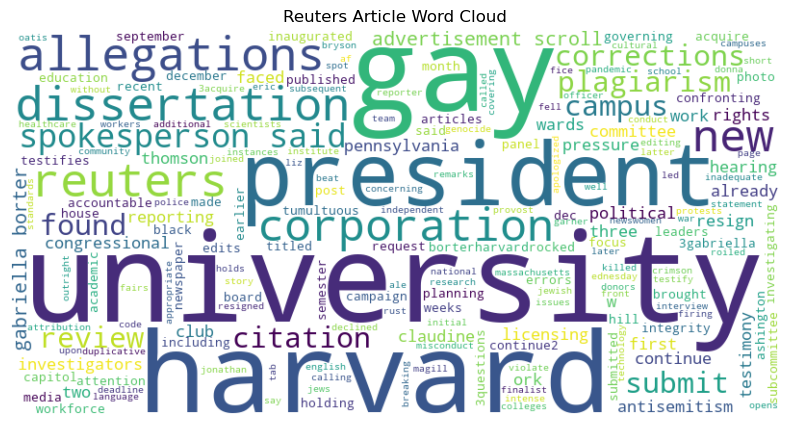

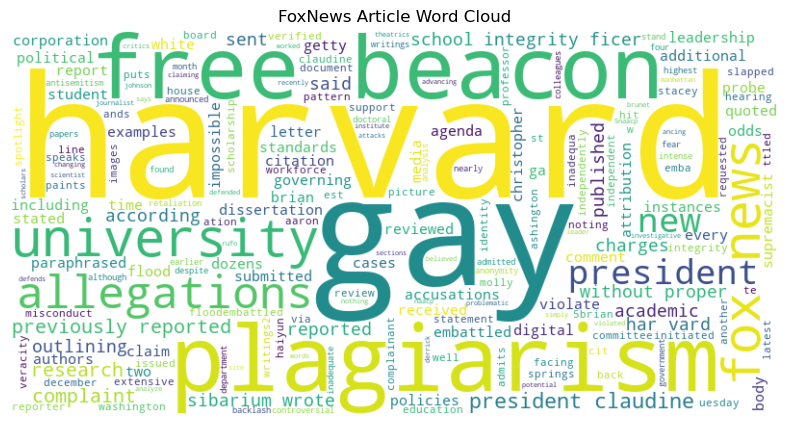

In [105]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Ensure necessary NLTK data is downloaded
try:
    nltk.data.find('stopwords')
except LookupError:
    nltk.download('stopwords')
try:
    nltk.data.find('punkt')
except LookupError:
    nltk.download('punkt')

def generate_wordcloud(text, title="Word Cloud"):
    
    stop_words = set(stopwords.words("english"))
    tokens = word_tokenize(text.lower())  # Tokenize and lowercase
    filtered_tokens = [word for word in tokens if word.isalnum() and word not in stop_words] #remove punctuation and numbers

    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(" ".join(filtered_tokens))

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title(title)
    plt.axis("off")
    plt.show()

# Generate Word Clouds:
generate_wordcloud(df_reuters_text, "Reuters Article Word Cloud")
generate_wordcloud(df_foxnews_text, "FoxNews Article Word Cloud")